In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
!pwd

/home/xstefan3/arqmath/compubert


In [138]:
import re
# parsing figure
float(re.search(r"Loss\ val\:\ (\d*\.\d*)", "Step 0/630: Loss val: 0.3030857443809509").group(1))

0.3030857443809509

In [ ]:
from matplotlib.pyplot import xticks

def plot_log(logbase1, logbase2=None, losses_plot=False, labels:list = None, per_epoch_steps=64692, eval_steps=2000):
    losses = []
    cos_sims = []
    labels = labels if labels is not None else [logbase1, logbase2] if logbase2 is not None else [logbase1]
    logfdir = logbase1 + ".log"
    for line in open(logfdir, "r"):
        loss_match = re.search(r"Loss\ val\:\ (\d*\.\d*)", line)
        cos_match = re.search(r"Objective\ val\:\ (\d*\.\d*)", line)
        if loss_match is not None:
            losses.append(float(loss_match.group(1)))
        if cos_match is not None:
            cos_sims.append(float(cos_match.group(1)))
            
    if logbase2 is not None:
        label2 = labels[1] if labels is not None else "_2"
        plot_log(logbase2, losses_plot=losses_plot)
    if losses_plot:
        ax = pd.Series(losses).iloc[2000:].plot(grid=True, figsize=(15, 8), alpha=0.4)
        pd.Series(losses).iloc[2000:].rolling(1000, win_type='triang').mean().plot(grid=True)
        xticks(range(0, len(losses), per_epoch_steps), ["Epoch %s" % e for e in range(0, len(losses), 1)])
    else:
        ax = pd.Series(cos_sims).plot(grid=True, figsize=(15, 8), alpha=0.8)
        pd.Series(cos_sims).rolling(20, win_type='triang').mean()[10:].reset_index()[0].plot(grid=True)
        per_epoch_evals = int(per_epoch_steps/eval_steps)
        xticks(range(0, len(cos_sims), per_epoch_evals), ["Epoch %s" % e for e in range(0, len(cos_sims), 1)])
    if len(labels) > 1:
        ax.legend([labels[1]]*2 + [labels[0]]*2)
# plot_log("train_sampled_eval5", "logs/train_sampled_eval6", losses_plot=False)
plot_log("logs/train_sampled_eval9", "logs/train_sampled_eval10", losses_plot=False, per_epoch_steps=41403, eval_steps=1250)

/home/xstefan3/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/xstefan3/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


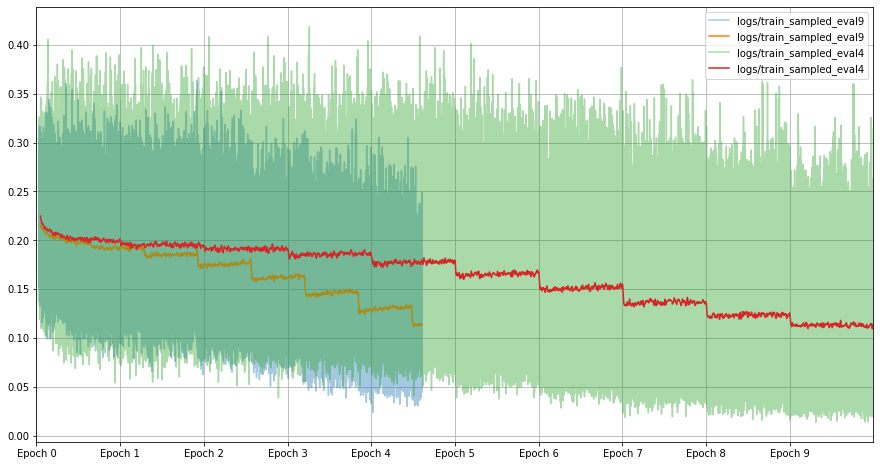

In [337]:
plot_log("logs/train_sampled_eval4", "logs/train_sampled_eval9", losses_plot=True)

### Other distance measures and metrics

In [165]:
similarities_df_old = similarities_df.iloc[:321]

In [89]:
import os
import numpy as np
from matplotlib.pyplot import xticks

# metrics = ['cosine_pearson', 'cosine_spearman',
#        'euclidean_pearson', 'euclidean_spearman', 'manhattan_pearson',
#        'manhattan_spearman', 'dot_pearson', 'dot_spearman']




def plot_metric(similarity_eval_df, corr_type, suffix='', ax=None, metrics=("cosine", "euclidean", "manhattan", "dot")):
    spearman_df = similarity_eval_df[["%s_%s" % (m, corr_type.lower()) for m in metrics]]
    if suffix:
        spearman_df.columns = [c+suffix if corr_type.lower() in c else c for c in spearman_df.columns]

    spearman_smoothed_df = pd.DataFrame()
    spearman_smoothed_df[["Smoothed %s" % c for c in spearman_df.columns]] = \
            spearman_df.apply(lambda c: c.rolling(20, win_type='triang').mean()[10:], axis=0).reset_index(drop=True)
    
    
    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    # smoothed
    ax = spearman_smoothed_df.plot(title='%s correlation for selected distance measures' % corr_type, grid=True, figsize=(12, 6), ax=ax)
    
    # oriinal
    ax2 = spearman_df.plot(grid=True, figsize=(18, 9), alpha=0.8, ax=ax)
    xticks(range(0, len(similarity_eval_df), 32), ["Epoch %s" % e for e in range(0, len(similarity_eval_df), 1)])
    #                      xticks=["Epoch %s" % int(i)/32 for i in range(0, len(similarity_eval_df), 32)])
    return ax2

<Figure size 1080x504 with 0 Axes>

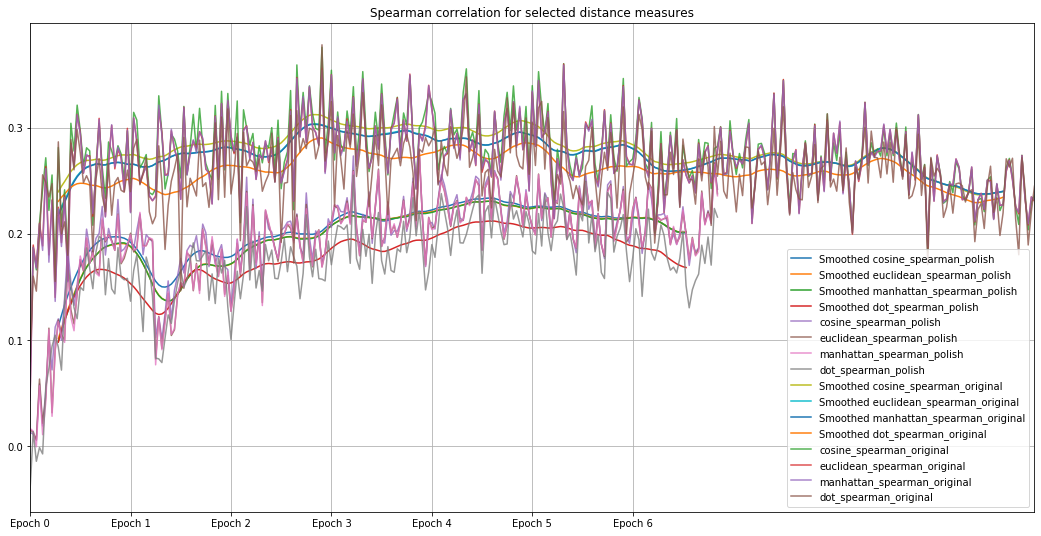

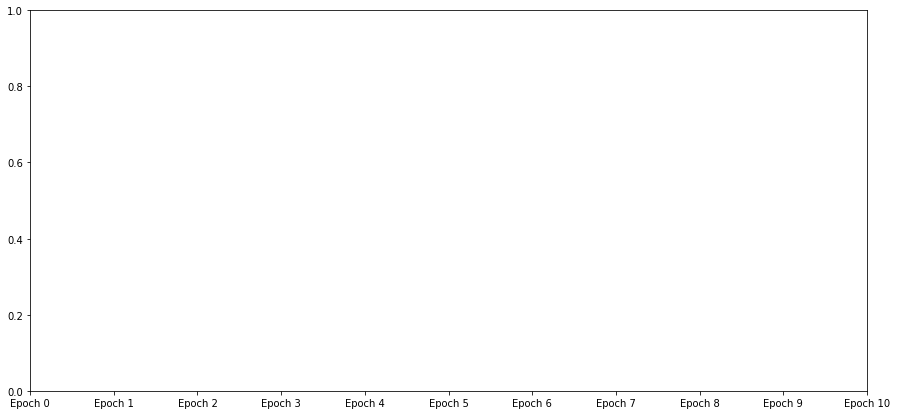

In [260]:
similarities_df_old = similarities_df.iloc[321:].reset_index()
ax = plot_metric(similarities_df_old, "Spearman", '_polish')
plot_metric(similarities_df[:321], "Spearman", '_original', ax=ax)

<Figure size 1080x504 with 0 Axes>

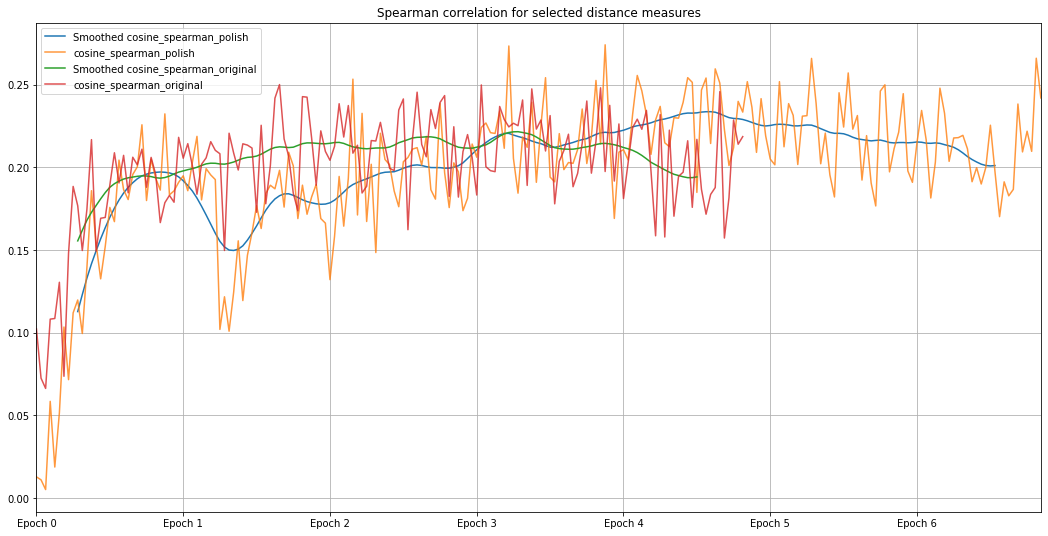

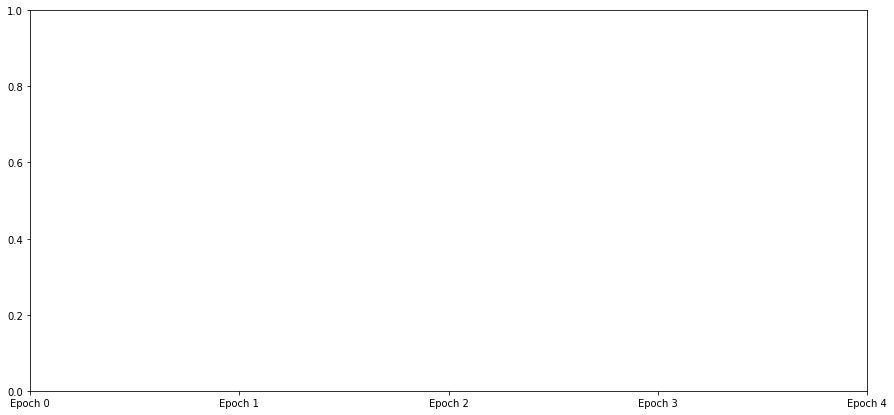

In [313]:
ax = plot_metric(similarities_df_old, "Spearman", '_polish', metrics=("cosine",))
ax = plot_metric(similarities_df[:321], "Spearman", '_original', ax=ax, metrics=("cosine",))

<Figure size 720x360 with 0 Axes>

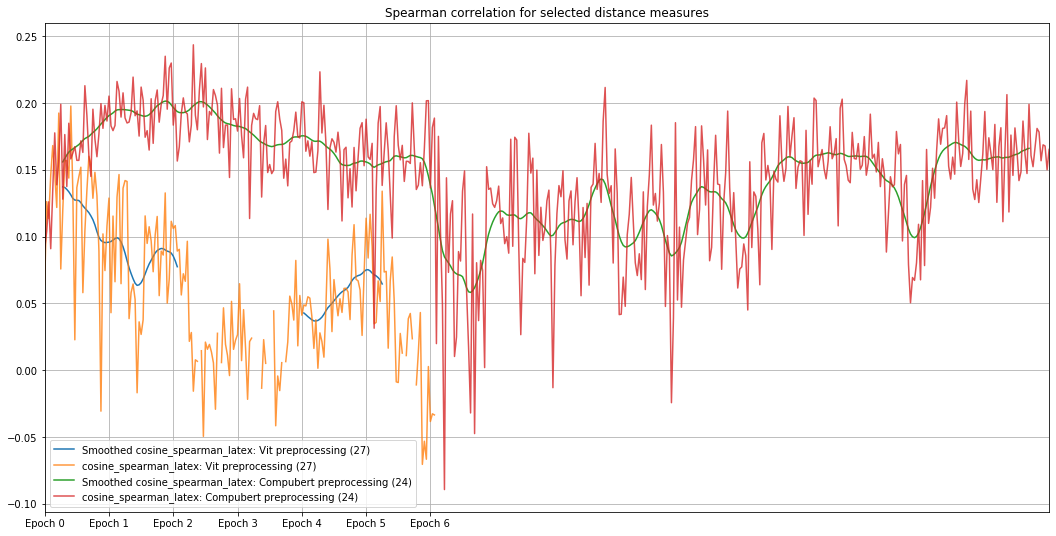

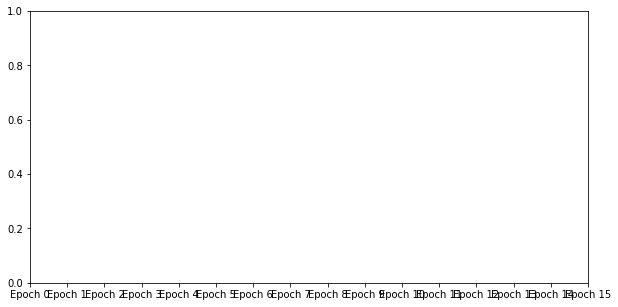

In [130]:
# similarities_df = pd.read_csv("logs/train_sampled_eval4/similarity_evaluation_results.csv")
# ax = plot_metric(similarities_df[:321], "Spearman", '_prefix', metrics=("cosine",))

similarities_df = pd.read_csv("logs/train_sampled_eval27/similarity_evaluation_results.csv")
ax = plot_metric(similarities_df, "Spearman", '_latex: Vit preprocessing (27)', metrics=("cosine",))

similarities_df = pd.read_csv("logs/train_sampled_eval24/similarity_evaluation_results.csv")
ax = plot_metric(similarities_df, "Spearman", '_latex: Compubert preprocessing (24)', metrics=("cosine",), ax=ax)


<Figure size 720x360 with 0 Axes>

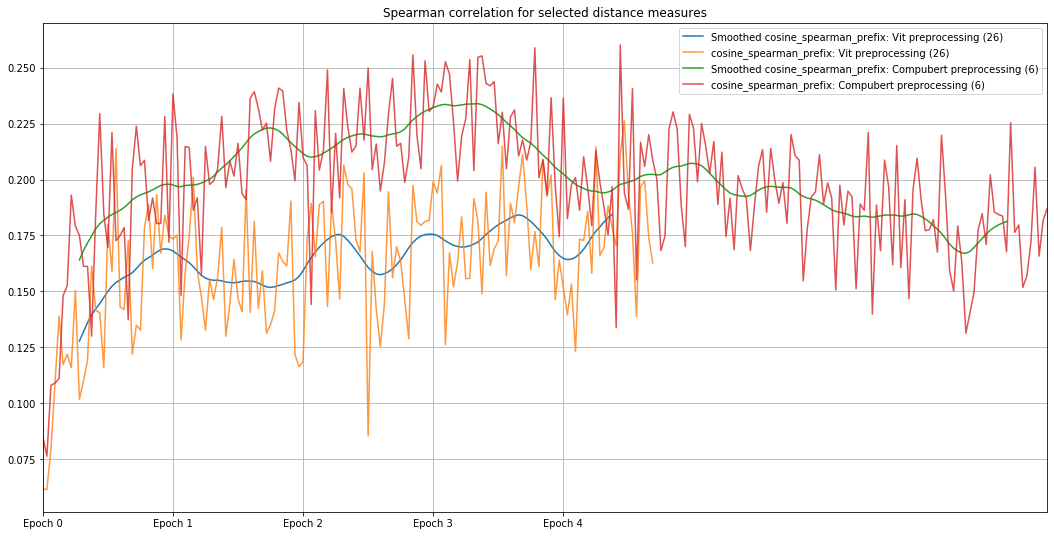

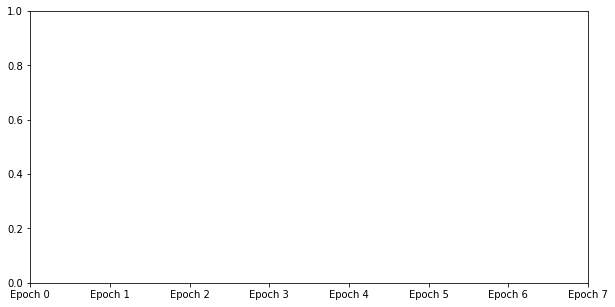

In [129]:
# similarities_df = pd.read_csv("logs/train_sampled_eval4/similarity_evaluation_results.csv")
# ax = plot_metric(similarities_df[:321], "Spearman", '_prefix', metrics=("cosine",))

similarities_df = pd.read_csv("logs/train_sampled_eval26/similarity_evaluation_results.csv")
ax = plot_metric(similarities_df, "Spearman", '_prefix: Vit preprocessing (26)', metrics=("cosine",))

similarities_df = pd.read_csv("logs/train_sampled_eval6/similarity_evaluation_results.csv")
ax = plot_metric(similarities_df, "Spearman", '_prefix: Compubert preprocessing (6)', metrics=("cosine",), ax=ax)


<Figure size 720x360 with 0 Axes>

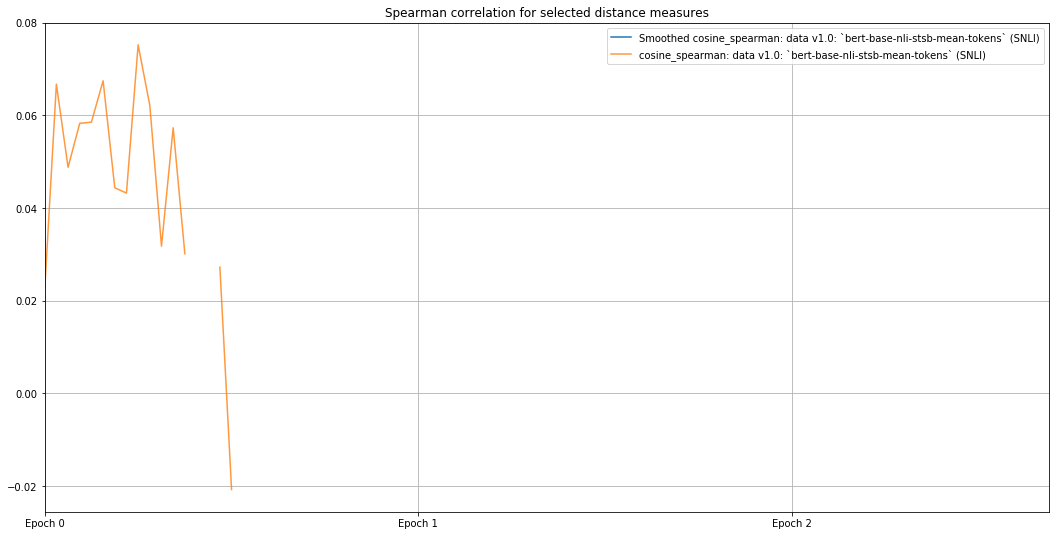

In [116]:
similarities_df = pd.read_csv("logs/train_sampled_eval23/similarity_evaluation_results.csv")
ax = plot_metric(similarities_df, "Spearman", ': data v1.0: `bert-base-nli-stsb-mean-tokens` (SNLI)', metrics=("cosine",))

# similarities_df = pd.read_csv("logs/train_sampled_eval23/similarity_evaluation_results.csv")
# ax = plot_metric(similarities_df, "Spearman", ': data v1.0: `bert-base-uncased` (Wiki)', metrics=("cosine",), ax=ax)


<Figure size 1080x504 with 0 Axes>

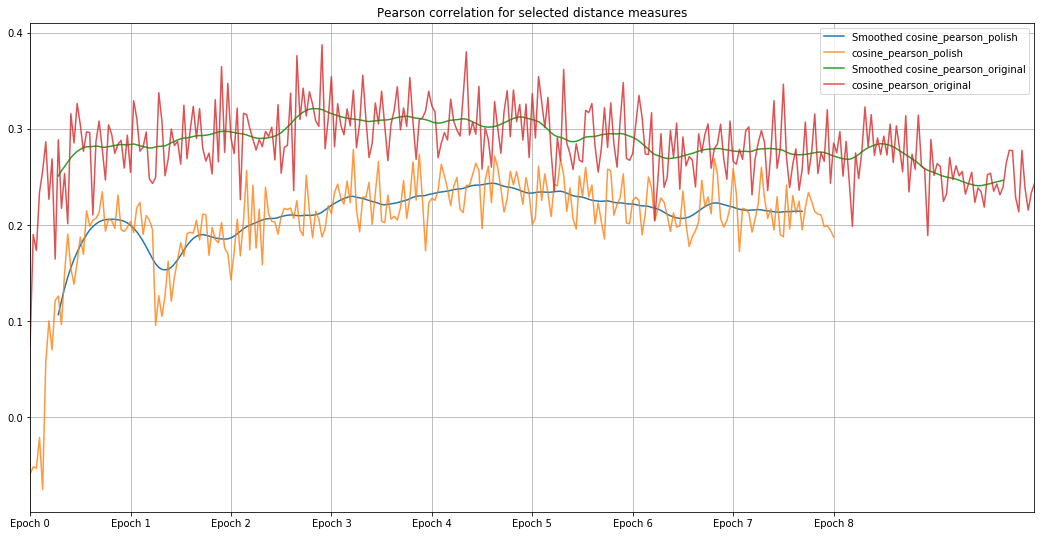

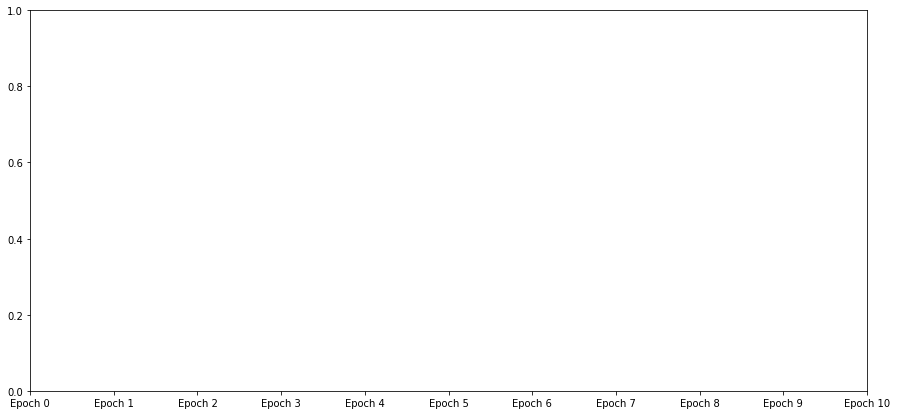

In [317]:
similarities_df = pd.read_csv("logs/train_sampled_eval4/similarity_evaluation_results.csv")

ax = plot_metric(similarities_df.iloc[321:].reset_index(), "Pearson", '_polish', metrics=("cosine",))
ax = plot_metric(similarities_df.iloc[:321], "Pearson", '_original', ax=ax, metrics=("cosine",))